# Task 7 - Sales Summary

In [2]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt

In [10]:
CSV_FILE = 'retail_sales_dataset.csv'
DB_FILE = 'sales_data.db'
TABLE_NAME = 'sales'

In [11]:
df_csv = pd.read_csv(CSV_FILE)

In [12]:
conn = sqlite3.connect(DB_FILE)

df_csv.to_sql(TABLE_NAME, conn, if_exists='replace', index=False)

print(f"Data from '{CSV_FILE}' loaded into SQLite table '{TABLE_NAME}' in '{DB_FILE}'.")

Data from 'retail_sales_dataset.csv' loaded into SQLite table 'sales' in 'sales_data.db'.


In [13]:
# Load into Pandas
sql_query = """
SELECT
    "Product Category" AS product,
    SUM(Quantity) AS total_quantity_sold,
    SUM("Total Amount") AS total_revenue
FROM
    sales
GROUP BY
    "Product Category"
ORDER BY
    total_revenue DESC;
"""

df_summary = pd.read_sql_query(sql_query, conn)

# To Close the database connection
conn.close()

In [14]:
# Summary
print("SQL Query Results (Sales Summary):")
print(df_summary)

SQL Query Results (Sales Summary):
       product  total_quantity_sold  total_revenue
0  Electronics                  849         156905
1     Clothing                  894         155580
2       Beauty                  771         143515


<>:5: SyntaxWarning: invalid escape sequence '\$'
<>:5: SyntaxWarning: invalid escape sequence '\$'
/tmp/ipython-input-1563909164.py:5: SyntaxWarning: invalid escape sequence '\$'
  plt.ylabel('Total Revenue (\$)', fontsize=12)


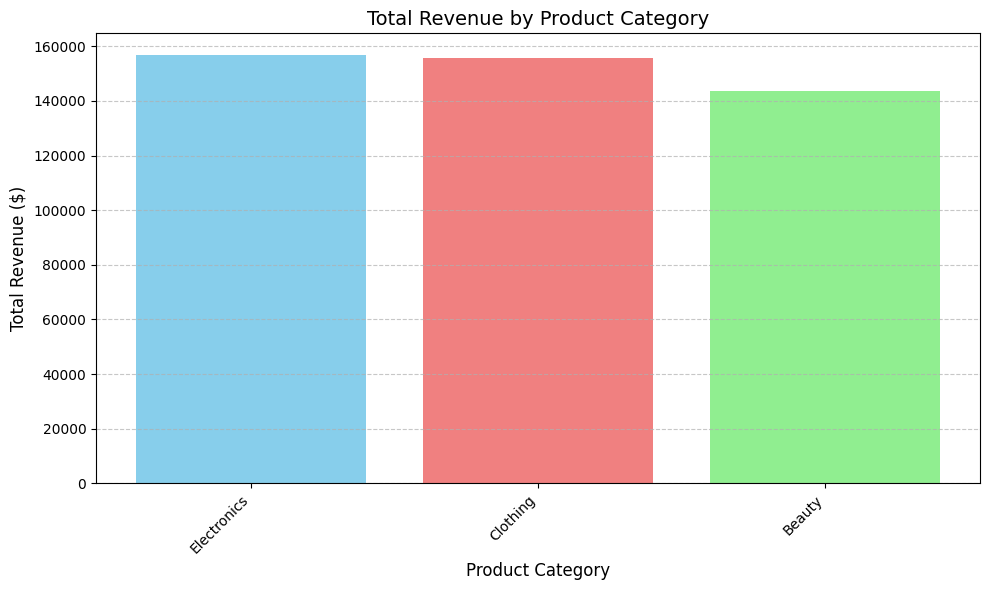

In [15]:
# Bar Chart
plt.figure(figsize=(10, 6))
plt.bar(df_summary['product'], df_summary['total_revenue'], color=['skyblue', 'lightcoral', 'lightgreen'])
plt.xlabel('Product Category', fontsize=12)
plt.ylabel('Total Revenue (\$)', fontsize=12)
plt.title('Total Revenue by Product Category', fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

In [9]:
# Save the chart
CHART_FILE = "sales_revenue_chart.png"
plt.savefig(CHART_FILE)

print(f"Chart saved as '{CHART_FILE}'")

Chart saved as 'sales_revenue_chart.png'


<Figure size 640x480 with 0 Axes>